# 2062. Count Vowel Substrings of a String

### Difficulty: <font color = green> Easy </font>
----

A substring is a contiguous (non-empty) sequence of characters within a string.

A vowel substring is a substring that only consists of vowels `('a', 'e', 'i', 'o', and 'u')` and has all five vowels present in it.

Given a string `word`, return the number of vowel substrings in `word`.

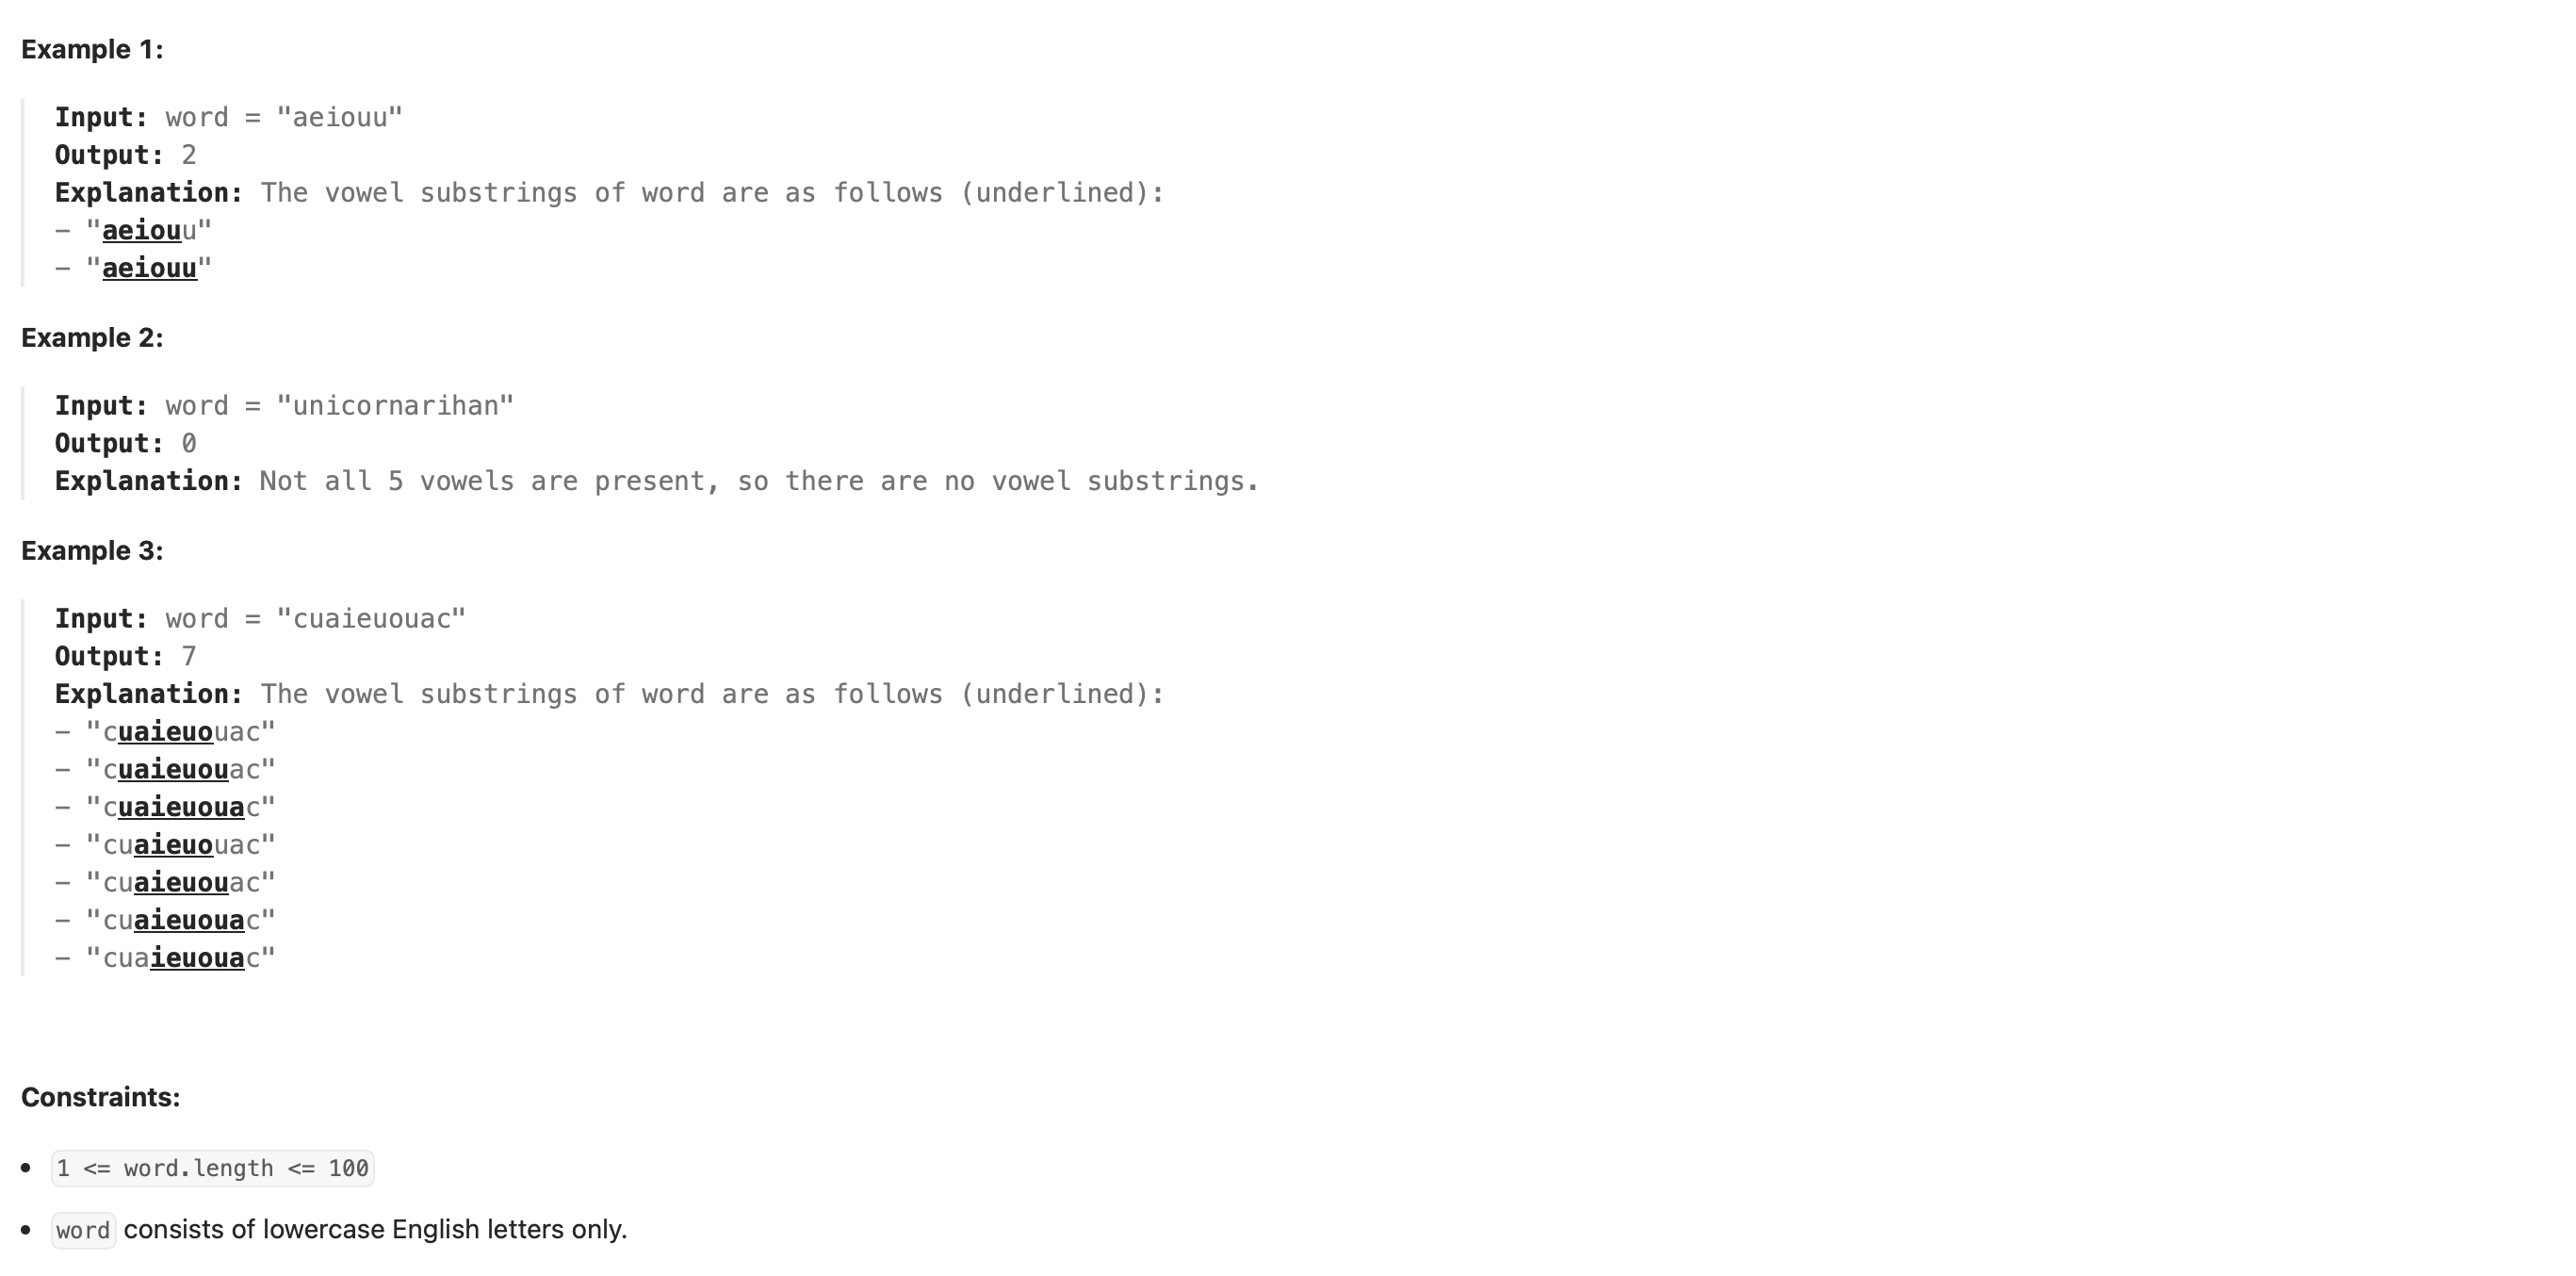

## Approach Overview:

We need to use the AtMost Trick to solve this problem. 

Basically, instead of directly calculating the number of vowel substrings in word **with exactly 5 vowels in them**. 

We reframe the question by calculating the number of susbtrings with **at most 5 vowels in them** and the number of substrings **with at most 4 vowels in them**. 

The difference will give us our desired result (number of vowel substrings in word **with exactly 5 vowels). 

`number of vowel substrings with exactly 5 vowels = number of susbtrings with at most 5 vowels in them -  number of substrings with at most 4 vowels in them`

So this becomes a essentially becomes a problem of finding the maximum number of susbtrings having a **specific contraint**. 

A classic sliding window problem :)

#### A smoother description of our general approach:

We need to use the AtMost Trick to solve this problem. Instead of directly calculating the number of vowel substrings in the word with exactly 5 vowels, we reframe the question. We calculate the number of substrings with at most 5 vowels and subtract the number of substrings with at most 4 vowels. The difference will give us our desired result: the number of vowel substrings in the word with exactly 5 vowels.


## Detailed Explanation:


Implementing the AtMost helper function (sliding window portion):

Loop through every character in word and at each iteration check if current character is a vowel. If character is a vowel then calculate its count in the substring and store results in a dictionary. We also make sure to track and update the number of unique vowels in current substring at each iteration.

*//check if character is a vowel*

`if word[right] in vowel:`

  *// check if current vowel is a unique*
  
  `if vowelCount.get(word[right],0) ==0:`
  
  *// if unique then increment `uniqueVowelCount`*
  
  `uniqueVowelCount += 1`
  
  *// calculate and store the count of current vowel*
  
  `vowelCount[word[right]] = vowelCount.get(word[right],0) + 1`
  
  
If character is not a vowel then skip it and update the window accordingly to look at and process the next immediate vowel substring in word.

`else:`

*// update left pointer such that it now points to the start of next vowel substring*

 `left = right + 1`
 
*// clear the contents in `vowelCount`* 
 
 `vowelCount = {}`
 
 *// reset `uniqueVowelCount` to ZERO*
 
 `uniqueVowelCount = 0`
 
 *// skip the current iteration and move to the next iteration of the loop*
 
 `continue`
 
 
Now we check if the current window (that's tracking the current vowel substring) is invalid. Meaning we're checking if the number odd numbers in susbtring window is more than target value / goal amount.

check if number of odd numbers in substring is more than target vaue / goal.

If yes, then shrink the substring until it becomes valid again by removing characters from the left. 


Once it's all done (i.e. we know current substring is a valid vowel susbtring), we then calculate the total number of valid vowel substrings it can form and add the results to the total number of valid vowel susbtrings seen before.

`substringCount += right - left + 1`


## Key Challenges:

I did a blunder when implementing the AtMost sliding window helper function. 

In this problem, each time we encounter a **non-vowel character**, we need to **skip it** and reset the susbtring window to a fresh new one starting at the next immediate **vowel character**. This is because our substring cannot contain any **non-vowel character**. If it did, it would be invalid, so we don't consider it.  

So each time we encounter a **non_vowel character** we need to skip it. We implement this by moving the `left pointer` to point at the next immediate **vowel character** in `word` and then clear the contents of `vowelCount` dictionary. 

Remember we're looking for a new vowel susbtring right? and `vowelCount` stores the character data of the previous valid vowel substring. 

Since we're going to consider a brand new vowel substring, we therefore need to clear `vowelCount`.

However, the one thing I forgot / didn't realize to do was to reset the `uniqueVowelCount` variable to **ZERO**. 

I needed to set it to zero because we don't yet know how many unique vowels are present in our next potential substring.

So I had to reset `uniqueVowelCount` (it keeps count of the number unique vowels in current substring window) to **zero**. I missed that and it held me back a bit.

## Solution:

In [ ]:
class Solution:
    def countVowelSubstrings(self, word: str) -> int:
        
        def AtMostK(k):

            #initialize `set`` to store all vowels
            vowelSet = set('aeiou')   
            
            # initialize `vowelCount` to store all vowels & its corresponding count in subtring
            vowelCount = {}   

            # initialize left pointer to use for the sliding window
            left = 0

            # initiate variable to track number of unique vowel in substring 
            uniqueVowelCount = 0
            
            # initialize variable to store total number of valid substrings seen so far
            substringCount = 0
            
            # loop through every character in word
            for right in range(len(word)):
                # check if current character is a vowel
                if word[right] in vowelSet:

                    # check if character is a new and unique vowel
                    if vowelCount.get(word[right], 0) == 0:
                        # increment number of unique vowel present in susbtring
                        uniqueVowelCount += 1
                    # calculate & store the count of current vowel character
                    vowelCount[word[right]] = vowelCount.get(word[right], 0) + 1
                
                # if character is not a vowel
                else:
                    # move substring window
                    left = right + 1
                    # reset & clear all items in `vowelCount` dictionary 
                    vowelCount = {}
                    # reset `uniqueVowelCount` to zero
                    uniqueVowelCount = 0
                    # continue for loop  
                    continue

                # check if number of unique vowels in substring is more than k (target value / goal)            
                # we're checking whether current susbtring is invalid   
                while uniqueVowelCount > k:
                    
                    # check if leftmost character in subsbtring is a vowel
                    if word[left] in vowelSet:
                        
                        # decrement the count of the leftmost character
                        vowelCount[word[left]] -= 1  
                        
                        # check if leftmost vowel character is no longer in susbtring window                    
                        if vowelCount[word[left]] == 0:
                            # if yes then decrement the number of unique vowels in substring window
                            uniqueVowelCount -= 1

                    # increment left pointer to slide substring window 
                    left += 1
                # calculate total number of valid vowel susbtrings seen so far
                substringCount += (right - left + 1)

            # return the number of susbtrings with *at most* k vowels in it
            return substringCount  

        # calculate & return the number of susbtrings in word containing excatly 5 vowels in them
        return AtMostK(5) - AtMostK(4)